# Деревья решений

## Из методички

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
RANDOM_SEED = 0

**Задача классификации**

Text(0, 0.5, 'X2')

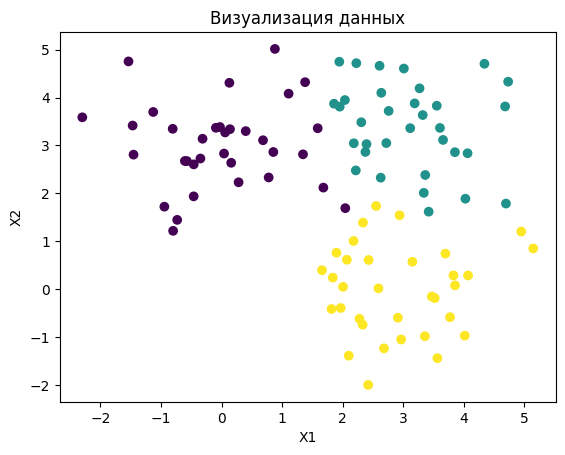

In [4]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Для нахождения оптимальной границы разбиения выборки - по умолчанию, критерий Джини, сейчас критерий информационной энтропии.

In [6]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

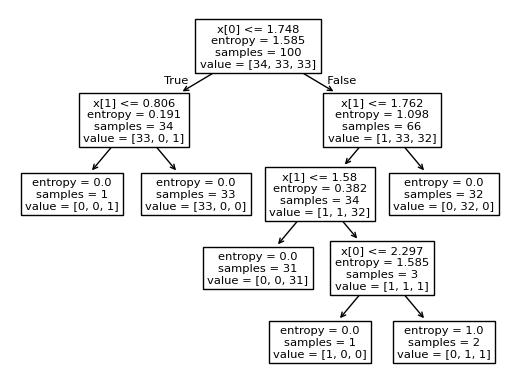

In [7]:
plot_tree(clf_tree)
plt.show()

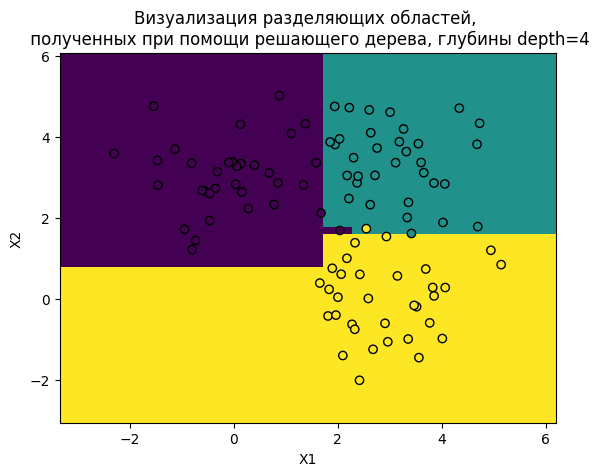

In [8]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [10]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


**Задача регрессии**

In [16]:
n_samples = 100
X = np.sort(np.random.rand(n_samples)).reshape((-1, 1))
y = np.exp(X[:, 0] ** 2+np.random.normal(0.0, 0.1, X.shape[0]))

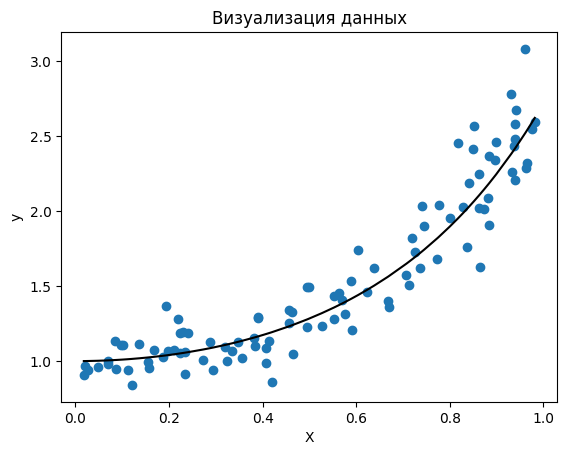

In [17]:
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], np.exp(X[:, 0] ** 2), c='k')

plt.title('Визуализация данных')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [21]:
y_pred_reg = reg_tree.predict(X)

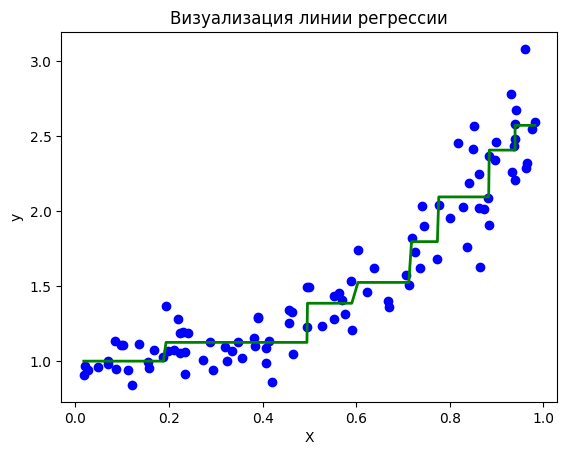

In [22]:
plt.scatter(X[:, 0], y, c="b")

plt.plot(X[:, 0], y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [23]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
print('r2 = ', r2_score(y, y_pred_reg))
print('MSE = ', mean_squared_error(y, y_pred_reg))

r2 =  0.9214233318842125
MSE =  0.024707529685229712


## Задания для самостоятельного выполнения

*1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.*

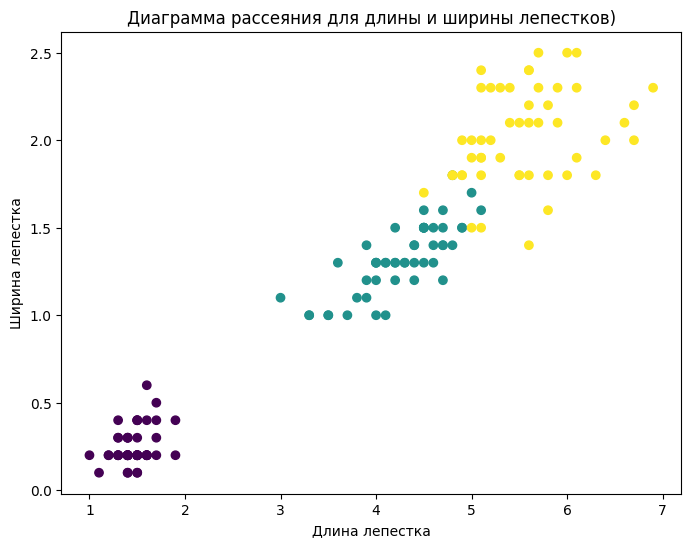

In [27]:
from sklearn.datasets import load_iris


data = load_iris()
X = data.data[:, 2:4]  # два признака (длина и ширина лепестков)
y = data.target

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Диаграмма рассеяния для длины и ширины лепестков)')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.show()


*2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.*

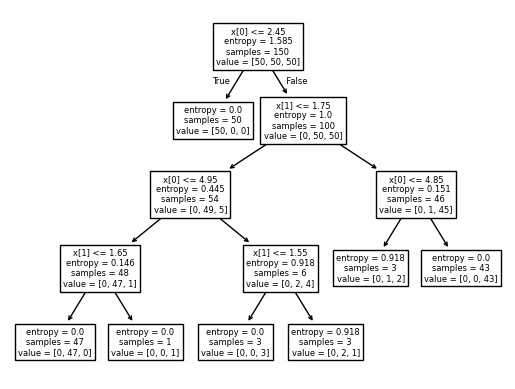

In [30]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X, y)

plot_tree(clf)
plt.show()


*3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.*

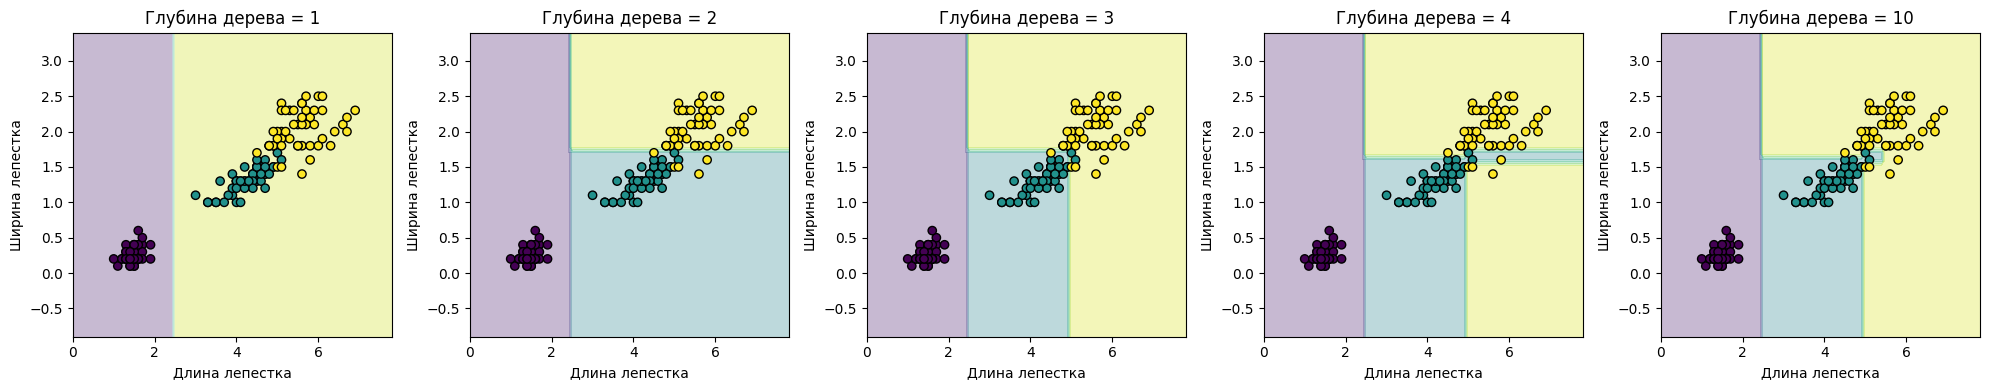

In [33]:
depths = [1, 2, 3, 4, 10]

fig, axes = plt.subplots(1, len(depths), figsize=(20, 4))

for i, depth in enumerate(depths):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X, y)

    # создание сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # график
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', cmap='viridis')
    ax.set_title(f'Глубина дерева = {depth}')
    ax.set_xlabel('Длина лепестка')
    ax.set_ylabel('Ширина лепестка')

plt.tight_layout()
plt.show()


*4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.*

In [35]:
for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X, y)

    y_pred = clf.predict(X)

    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='micro')
    cm = confusion_matrix(y, y_pred)

    print(f"Глубина дерева = {depth}")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"F1-score = {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print()


Глубина дерева = 1
Accuracy = 0.6667
F1-score = 0.6667
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]

Глубина дерева = 2
Accuracy = 0.9600
F1-score = 0.9600
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]

Глубина дерева = 3
Accuracy = 0.9733
F1-score = 0.9733
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

Глубина дерева = 4
Accuracy = 0.9867
F1-score = 0.9867
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]

Глубина дерева = 10
Accuracy = 0.9933
F1-score = 0.9933
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]



*5.Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.*

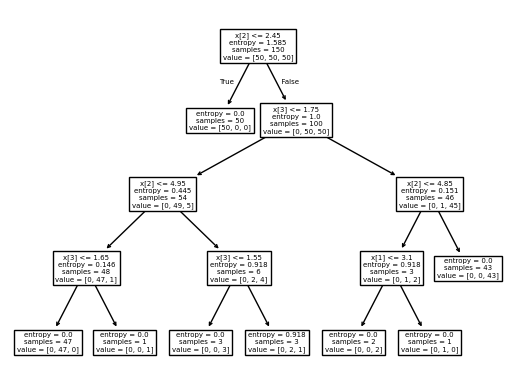

Accuracy = 0.9933
F1-score = 0.9933
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]


In [38]:
data = load_iris()

X = data.data
y = data.target


clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X, y)

plot_tree(clf)
plt.show()

y_pred = clf.predict(X)

accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='micro')
cm = confusion_matrix(y, y_pred)

print(f"Accuracy = {accuracy:.4f}")
print(f"F1-score = {f1:.4f}")
print("Confusion Matrix:")
print(cm)


*6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.*

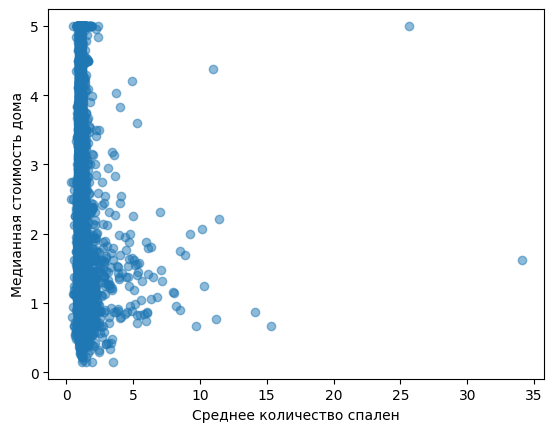

In [40]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data[:, 3]  # столбец AveBedrms
y = data.target  # целевая переменная (Median house value)

plt.scatter(X, y, alpha=0.5)
plt.xlabel('Среднее количество спален')
plt.ylabel('Медианная стоимость дома')
plt.show()


*7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.*

In [42]:
data = fetch_california_housing()
X = data.data[:, 3].reshape(-1, 1)
y = data.target

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

y_pred = regressor.predict(X)


In [44]:
print("Первые 5 предсказаний:", y_pred[:5])

Первые 5 предсказаний: [2.1635     3.585      2.62233333 2.11       1.774     ]


*8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.*

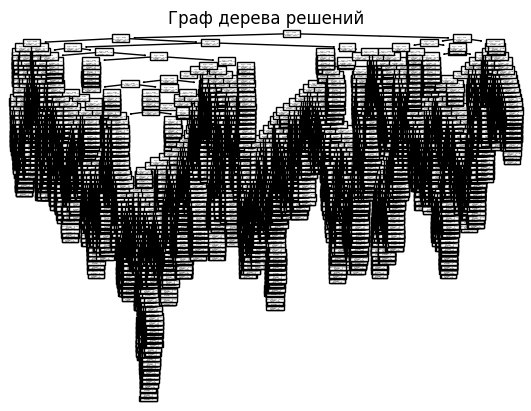

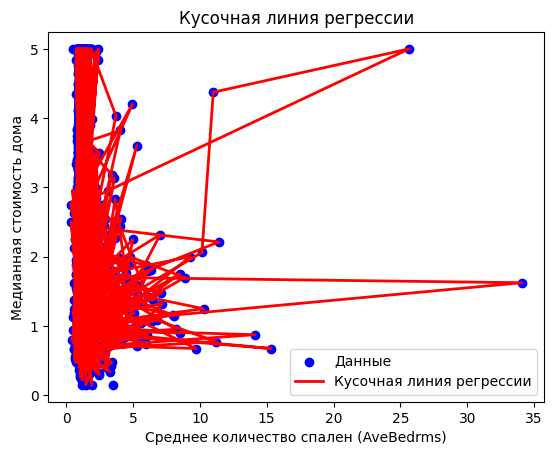

In [45]:
plot_tree(regressor)
plt.title('Граф дерева решений')
plt.show()

X_grid = X.reshape(-1, 1)
y_pred = regressor.predict(X_grid)

plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X_grid, y_pred, color='red', linewidth=2, label='Кусочная линия регрессии')
plt.title('Кусочная линия регрессии')
plt.xlabel('Среднее количество спален (AveBedrms)')
plt.ylabel('Медианная стоимость дома')
plt.legend()
plt.show()


*9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.*

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("R^2:", r2)

new_observation = [[3.0]]  # новое значения AveBedrms
new_prediction = regressor.predict(new_observation)

print("AveBedrms = 3.0:", new_prediction)


MSE: 0.4271974030094434
R^2: 0.679172913720798
AveBedrms = 3.0: [0.413]


*10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.*

In [48]:
data = fetch_california_housing()
X = data.data
y = data.target

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# plot_tree(regressor)
# plt.title('Граф дерева решений')
# plt.show()

y_pred = regressor.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("R^2:", r2)


MSE: 9.528247270910767e-32
R^2: 1.0
